<a href="https://colab.research.google.com/github/bkytpe/ML2020/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train,y_train),(x_test,y_test)= load_data()
load_data()
x_train
x_test
y_train
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [84]:
# 28 像素 x 28 像素，每一張圖片就可以用 28 x 28 = 784 個數字來記錄
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [85]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [86]:
import pandas as pd
print(labels[y_train[0]]) #隨便讀一筆資料來看看結果
pd.DataFrame(x_train[0]) #隨便讀一筆資料來看看原始資料

Ankle boot


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


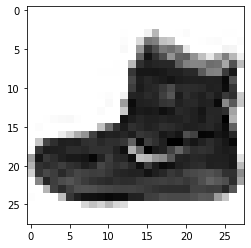

In [87]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = "gray_r")#隨便讀一筆原始資料來畫圖

In [88]:
#準備模型支架
#把激活函數偏移到原點(用bias)
from tensorflow.keras.models import Sequential #支架
from tensorflow.keras.layers import Dense #layer
layers = [
    Dense(256,activation = "relu",input_dim = 784), # Param# : 28*28*256 + 256
    Dense(10,activation = "softmax") #28*28*10
]
model = Sequential(layers) #支架+layer就是模型
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [89]:
# loss function採用CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss= SparseCategoricalCrossentropy(),
              optimizer = "adam",
              metrics = ["accuracy"])

In [90]:
#資料預處理
#X: 1. reshape成一維，2. scaling成0-1
#Y: one hot encoding--->改成SparseCategoricalCrossentropy就不用one hot encoding(節省很多RAM)
from tensorflow.keras.utils import to_categorical
x_train_r = x_train.reshape(-1,784)/255
x_test_r = x_test.reshape(-1,784)/255

# y_train_cat = to_categorical(y_train, num_classes=10)
# y_test_cat = to_categorical(y_test, num_classes=10)

In [91]:
#把預處理好的資料丟入模型訓練
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience = 5,restore_best_weights=True),
    ModelCheckpoint("mlp.h5",save_best_only=True)
]
model.fit(x_train_r,
      y_train,
      validation_split = 0.1, 
      batch_size=200, 
      epochs = 50,#模型訓練幾次
      verbose = 2,#每次一行
      callbacks = callbacks)

Epoch 1/50
270/270 - 2s - loss: 0.5581 - accuracy: 0.8102 - val_loss: 0.4386 - val_accuracy: 0.8443
Epoch 2/50
270/270 - 1s - loss: 0.4049 - accuracy: 0.8579 - val_loss: 0.4223 - val_accuracy: 0.8525
Epoch 3/50
270/270 - 1s - loss: 0.3703 - accuracy: 0.8692 - val_loss: 0.3544 - val_accuracy: 0.8713
Epoch 4/50
270/270 - 1s - loss: 0.3395 - accuracy: 0.8787 - val_loss: 0.3422 - val_accuracy: 0.8777
Epoch 5/50
270/270 - 1s - loss: 0.3202 - accuracy: 0.8838 - val_loss: 0.3425 - val_accuracy: 0.8717
Epoch 6/50
270/270 - 1s - loss: 0.3002 - accuracy: 0.8911 - val_loss: 0.3204 - val_accuracy: 0.8837
Epoch 7/50
270/270 - 1s - loss: 0.2896 - accuracy: 0.8950 - val_loss: 0.3231 - val_accuracy: 0.8848
Epoch 8/50
270/270 - 1s - loss: 0.2791 - accuracy: 0.8991 - val_loss: 0.3400 - val_accuracy: 0.8763
Epoch 9/50
270/270 - 1s - loss: 0.2661 - accuracy: 0.9032 - val_loss: 0.3270 - val_accuracy: 0.8833
Epoch 10/50
270/270 - 1s - loss: 0.2571 - accuracy: 0.9067 - val_loss: 0.3242 - val_accuracy: 0.8822

In [92]:
#看一下模型訓練成效
model.evaluate(x_test_r,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.8894


[0.3145003318786621, 0.8894000053405762]

In [93]:
#用test資料來看模型預測結果
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_r)
con_mat = confusion_matrix(y_test,pre) #出了tensorflow就帶原本的
pd.DataFrame(con_mat,index= ["{}(真實)".format(labels[i]) for i in range(10)],
             columns = ["{}(預測)".format(labels[i]) for i in range(10)]
             )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),827,4,8,20,3,2,129,0,7,0
Trouser(真實),0,978,1,14,2,0,4,0,1,0
Pullover(真實),18,0,762,16,114,0,88,0,2,0
Dress(真實),23,5,10,906,22,0,30,0,4,0
Coat(真實),1,1,58,41,835,0,62,0,2,0
Sandal(真實),0,0,0,1,0,957,0,26,2,14
Shirt(真實),103,0,58,27,68,0,738,0,6,0
Sneaker(真實),0,0,0,0,0,7,0,975,2,16
Bag(真實),6,0,1,6,4,1,3,5,974,0
Ankle boot(真實),0,0,0,0,0,8,1,49,0,942


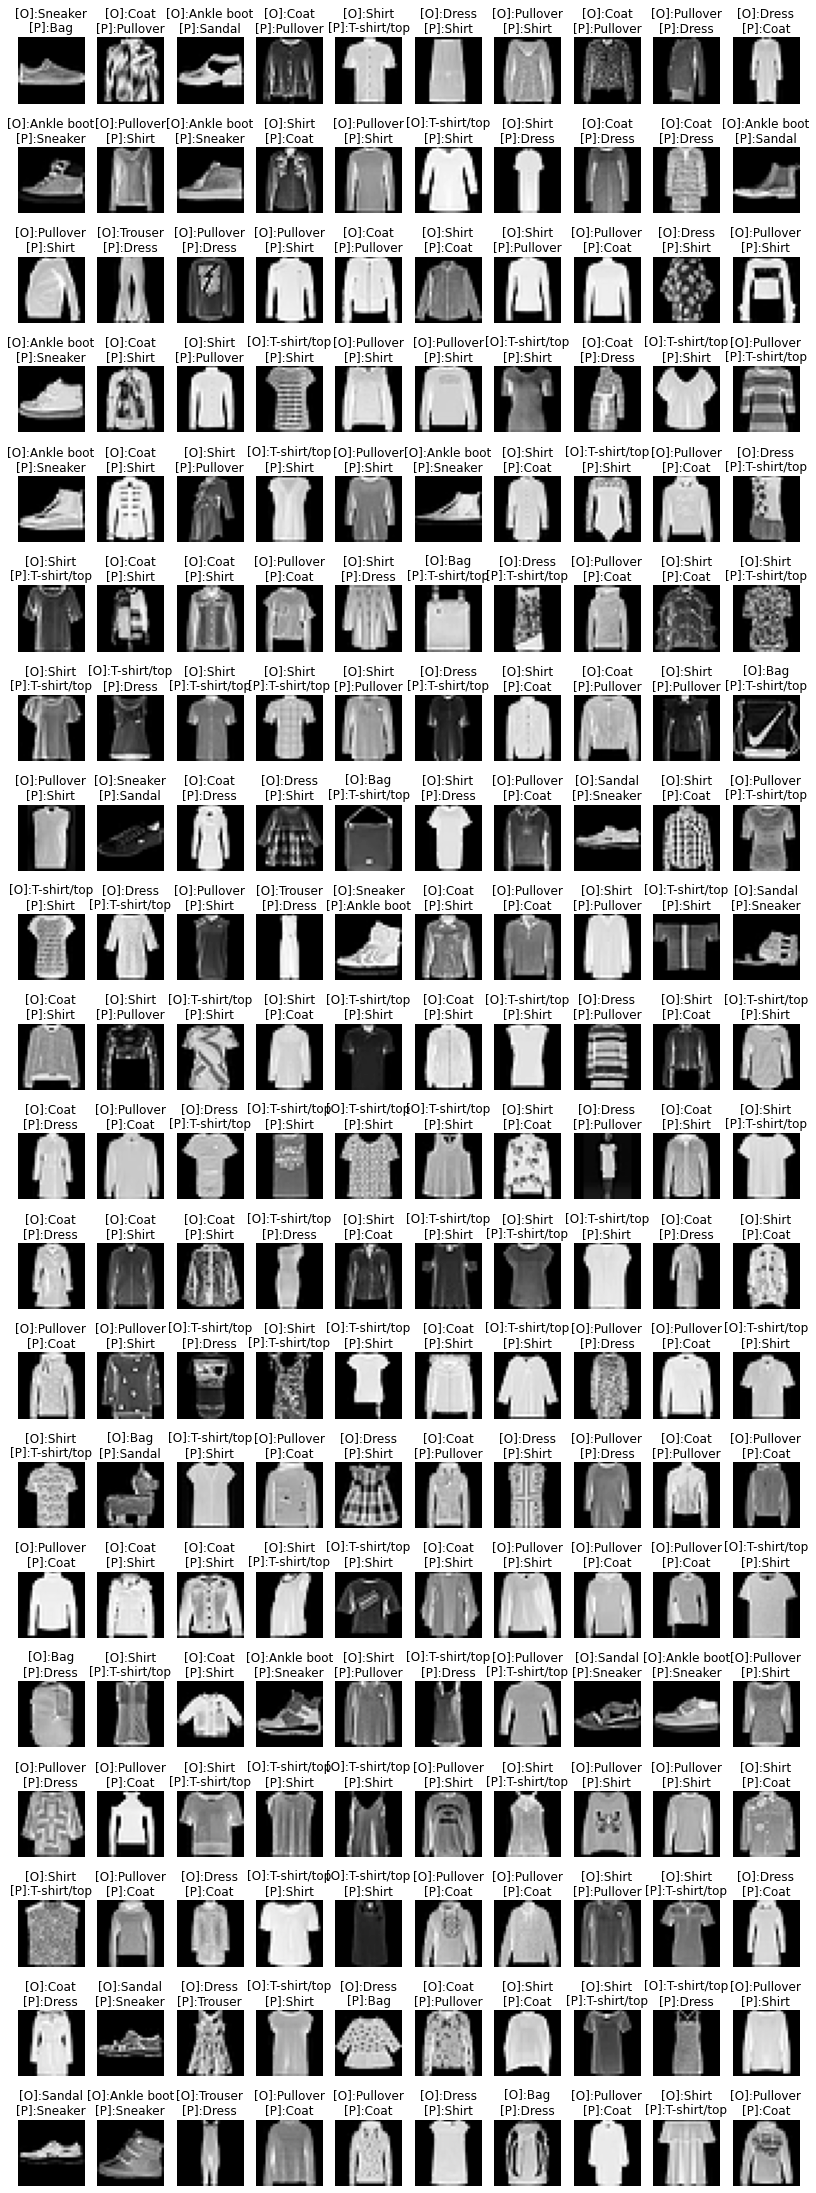

In [94]:
#看一下預測錯誤的情形
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200] #預測錯誤太多，只看前200筆
false_pre = pre[idx]
false_ori = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize = (14,42))
width = 10
height = len(idx)//width + 1
for i in range(len(idx)):
    plt.subplot(height, width , i+1)
    t = "[O]:{}\n[P]:{}".format(labels[false_ori[i]], labels[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i],cmap="gray")

url:https://cf.shopee.tw/file/61dd2eef232fb536927fdd2f101fc523
T-shirt/top 的機率: 0.0
Trouser 的機率: 0.0
Pullover 的機率: 0.0
Dress 的機率: 1.0
Coat 的機率: 0.0
Sandal 的機率: 0.0
Shirt 的機率: 0.0
Sneaker 的機率: 0.0
Bag 的機率: 0.0
Ankle boot 的機率: 0.0
答案: Dress


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


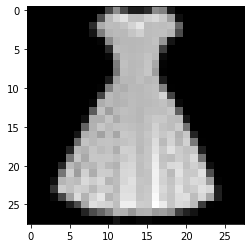

In [95]:
# PIL(pillow)
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import requests
url = input("url:")
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=headers)

img = Image.open(response.raw).resize((28, 28)).convert("L")
img = 1 - np.array(img) #黑轉白
img_r = img.reshape(1, 784) / 255
proba = model.predict(img_r)[0]
for i in range(10):
    print(labels[i], "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", labels[ans])
plt.imshow(img, cmap="gray")
#https://cf.shopee.tw/file/61dd2eef232fb536927fdd2f101fc523

In [96]:
import numpy as np

a = np.array([
          [1,2],[3,4]
])
a*2

array([[2, 4],
       [6, 8]])

In [97]:
l = [
     (170,50),
     (150,60),
     (160,80),
     (160,70)
]
def k(p) :
    return p[0]+p[1]

sorted(l, key = k ) #保留舊，回傳新
# l.sorted #直接改舊，不回傳

sorted(l,key = lambda x:(x[0],-x[1])) #負號的妙用

[(150, 60), (160, 80), (160, 70), (170, 50)]